# Esercitazione 8

## Filtering & Denoising

#### Sommario

Il filtraggio dei segnali è una tecnica fondamentale nell'ambito dell'elaborazione dei dati, utilizzata per ridurre il rumore, estrarre informazioni rilevanti o stimare grandezze nascoste. In particolare, i filtri digitali, come il filtro a media mobile e il leaky integrator, permettono di attenuare le componenti indesiderate di un segnale mantenendo inalterate le caratteristiche principali. Questa esercitazione esplora l'applicazione di tali tecniche in due contesti distinti: l'elaborazione di segnali audio per la rimozione del rumore e l'analisi di dati finanziari.

In [1]:
import numpy as np 
import matplotlib.pylab as plt
import scipy.io as sio
from scipy import fftpack as f
import scipy.io.wavfile as wav

#### Esercizio 1: Denoising di un segnale audio

(a) Leggere il file `jingle.mat` (scaricabile dalla cartella del corso) utilizzando il comando:

```
np.squeeze(sio.loadmat('jingle.mat')['jingle'])
```

Il file contiene un breve segnale audio $x(t)$. Fare un plot del segnale (nel tempo e in frequenza). Salvare il segnale $x(t)$ come file audio utilizzando `sio.wavfile.write('jingle.wav', 44000, x)` e provare ad ascoltarlo.

(b) Creare un vettore $n(t)$ della stessa lunghezza del segnale contenente rumore gaussiano con media $\mu = 0$ e deviazione standard $\sigma = 0.01\$. Utilizzare il comando `np.random.normal(mu, sigma, N)` per ottenere $N$ campioni.

(c) Fare un plot del segnale rumoroso $x\_n(t) = x(t) + n(t)$ (nel tempo e in frequenza), salvare il segnale $x\_n(t)$ come file audio e provare ad ascoltarlo.

(d) Calcolare la media locale (filtro a media mobile) definita come:

$\tilde{x}(t) = \frac{1}{M} \sum_{k=0}^{M-1} x_n(t-k),$

considerare $M = 10$. Calcolare $\tilde{x}(t)$ utilizzando l'operazione di convoluzione. Salvare i segnali ottenuti come file audio e provare ad ascoltarli.

(e) Calcolare la media locale pesata esponenzialmente utilizzando il leaky integrator:

$h(t) = (1-\lambda) \lambda^{t} u(t),$

dove $u(t)$ è la funzione gradino, $t$ è un vettore di 100 punti equispaziati compresi tra $0$ e $99$ e $\lambda = 0.9$. Calcolare $\tilde{x}(t)$ utilizzando la convoluzione con il filtro $h(t)$. Salvare il segnale ottenuto come file audio e provare ad ascoltarlo.

Segnale originale caricato: 255000 campioni


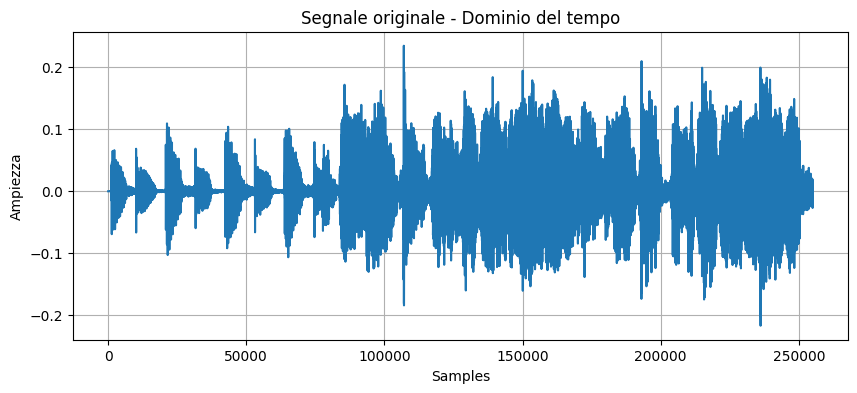

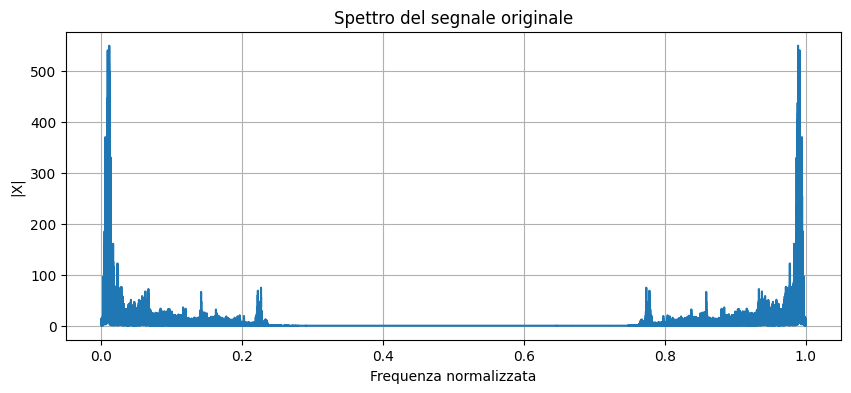

File 'jingle.wav' salvato.
Rumore gaussiano aggiunto (σ = 0.01)


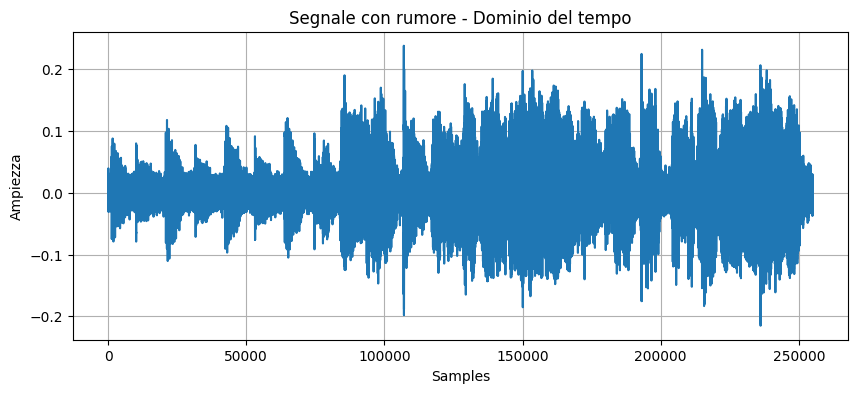

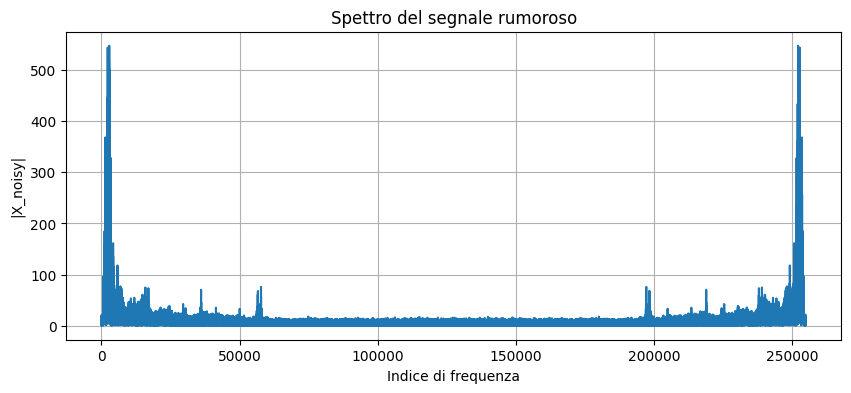

File 'jingle_noisy.wav' salvato.
Filtro a media mobile applicato (M = 10)


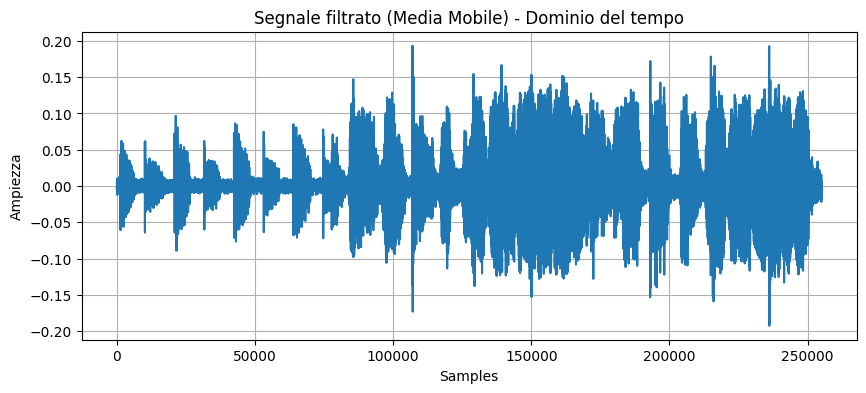

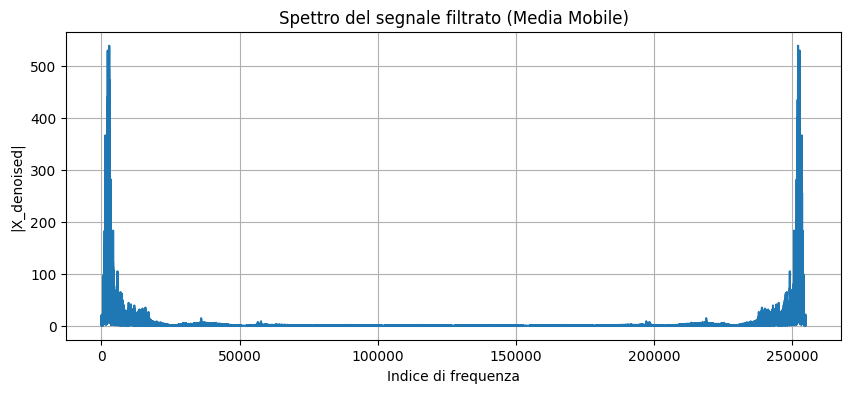

File 'jingle_denoised.wav' salvato.
Leaky integrator applicato (λ = 0.9)


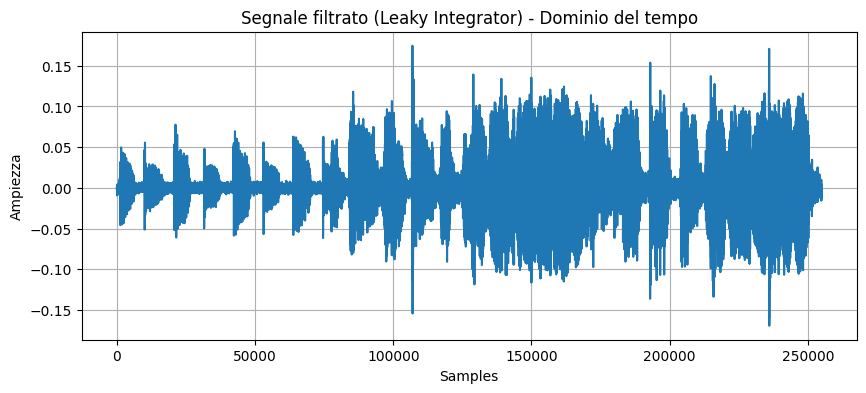

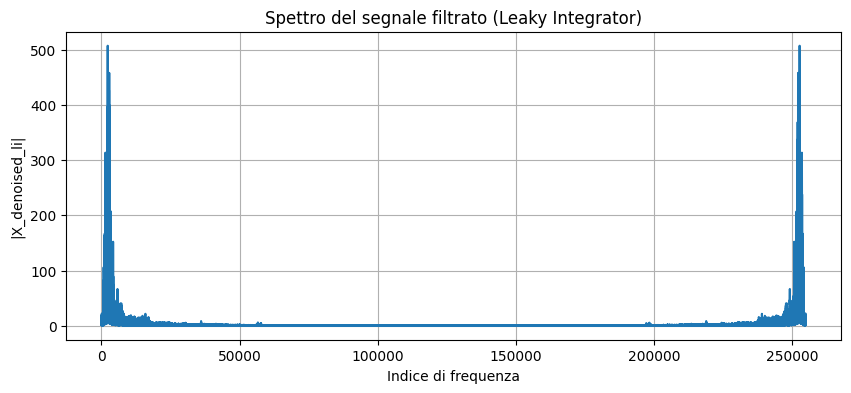

File 'jingle_denoised_li.wav' salvato.


In [4]:
# ===========================
# (a) Segnale originale
# ===========================
x = np.squeeze(sio.loadmat('jingle.mat')['jingle'])
print(f"Segnale originale caricato: {x.shape[0]} campioni")

# Plot nel dominio del tempo
plt.figure(figsize=(10, 4))
plt.plot(x)
plt.xlabel('Samples')
plt.ylabel('Ampiezza')
plt.title('Segnale originale - Dominio del tempo')
plt.grid(True)
plt.show()

# Spettro
X = f.fft(x)
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(X)) / len(X), np.abs(X))
plt.xlabel('Frequenza normalizzata')
plt.ylabel('|X|')
plt.title('Spettro del segnale originale')
plt.grid(True)
plt.show()

# Salvataggio audio
sio.wavfile.write('jingle.wav', 44000, x)
print("File 'jingle.wav' salvato.")

# ===========================
# (b) Rumore gaussiano
# ===========================
n = np.random.normal(0, 0.01, len(x))
xn = x + n
print("Rumore gaussiano aggiunto (σ = 0.01)")

# Plot dominio del tempo
plt.figure(figsize=(10, 4))
plt.plot(xn)
plt.xlabel('Samples')
plt.ylabel('Ampiezza')
plt.title('Segnale con rumore - Dominio del tempo')
plt.grid(True)
plt.show()

# Spettro
Xn = f.fft(xn)
plt.figure(figsize=(10, 4))
plt.plot(np.abs(Xn))
plt.xlabel('Indice di frequenza')
plt.ylabel('|X_noisy|')
plt.title('Spettro del segnale rumoroso')
plt.grid(True)
plt.show()

# Salvataggio audio
sio.wavfile.write('jingle_noisy.wav', 44000, xn)
print("File 'jingle_noisy.wav' salvato.")

# ===========================
# (d) Filtro a media mobile
# ===========================
M = 10
h = np.ones(M) / M
y_ma = np.convolve(xn, h, mode='valid')
print(f"Filtro a media mobile applicato (M = {M})")

# Plot tempo
plt.figure(figsize=(10, 4))
plt.plot(y_ma)
plt.xlabel('Samples')
plt.ylabel('Ampiezza')
plt.title('Segnale filtrato (Media Mobile) - Dominio del tempo')
plt.grid(True)
plt.show()

# Spettro
Y_ma = f.fft(y_ma)
plt.figure(figsize=(10, 4))
plt.plot(np.abs(Y_ma))
plt.xlabel('Indice di frequenza')
plt.ylabel('|X_denoised|')
plt.title('Spettro del segnale filtrato (Media Mobile)')
plt.grid(True)
plt.show()

# Salvataggio audio
sio.wavfile.write('jingle_denoised.wav', 44000, y_ma)
print("File 'jingle_denoised.wav' salvato.")

# ===========================
# (e) Filtro Leaky Integrator
# ===========================
lmbd = 0.9
h_li = (1 - lmbd) * np.power(lmbd, np.arange(100))
y_li = np.convolve(xn, h_li, mode='valid')
print(f"Leaky integrator applicato (λ = {lmbd})")

# Plot tempo
plt.figure(figsize=(10, 4))
plt.plot(y_li)
plt.xlabel('Samples')
plt.ylabel('Ampiezza')
plt.title('Segnale filtrato (Leaky Integrator) - Dominio del tempo')
plt.grid(True)
plt.show()

# Spettro
Y_li = f.fft(y_li)
plt.figure(figsize=(10, 4))
plt.plot(np.abs(Y_li))
plt.xlabel('Indice di frequenza')
plt.ylabel('|X_denoised_li|')
plt.title('Spettro del segnale filtrato (Leaky Integrator)')
plt.grid(True)
plt.show()

# Salvataggio audio
sio.wavfile.write('jingle_denoised_li.wav', 44000, y_li)
print("File 'jingle_denoised_li.wav' salvato.")


#### Esercizio 2: Misurare il rischio finanziario

(a) Leggere il file `data.mat` (scaricabile dalla cartella del corso). Il file contiene due matrici `dates_ts` e `price_ts` che descrivono l'evoluzione del prezzo di un pacchetto azionario in 5 anni (campionato con frequenza giornaliera). Fare un plot dei dati.

(b) Calcolare il ritorno dell'investimento $r(t)$ definito come:

$r(t) = \frac{p(t)-p(t-1)}{p(t)},$

dove $p(t)$ è il prezzo delle azioni al tempo $t$. Calcolare il ritorno per i dati forniti e fare un plot del risultato.

(c) Stimare la volatilità utilizzando la finestra mobile di ampiezza $M$. Calcolare il ritorno medio $\bar{r}(t)$ sugli ultimi $M$ campioni:

$\bar{r}(t) = \frac{1}{M} \sum_{k=0}^{M-1} r(t-k),$

e la volatilità:

$\sigma(t) = \sqrt{\frac{1}{M} \sum_{k=0}^{M-1} (r(t-k) - \bar{r}(t))^2 }.$

Considerare diversi valori di \$M = 20, 50, 70, 100\$ e per ognuno calcolare $\bar{r}(t)$ e $\sigma(t)$ utilizzando l'operazione di convoluzione e fare i plot dei risultati.

(d) Calcolare il ritorno medio e la volatilità utilizzando il leaky integrator presentato nell'esercizio precedente (utilizzando $\lambda = 0.94$) e fare un plot del risultato.

Dati caricati: 1306 prezzi giornalieri.


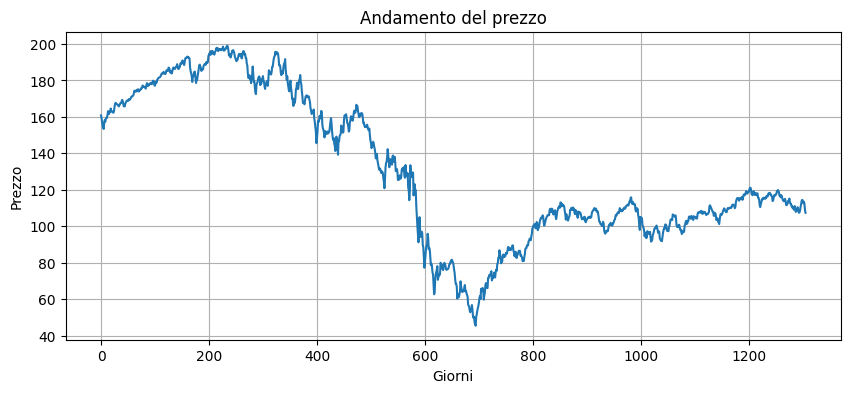

Ritorni calcolati: 1305 campioni.


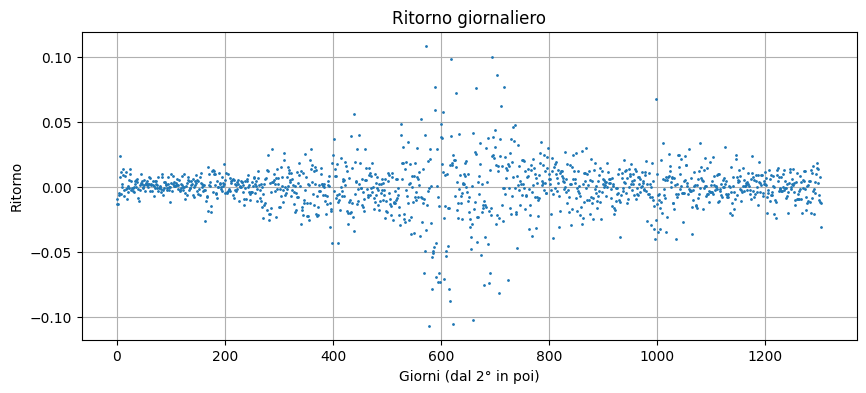

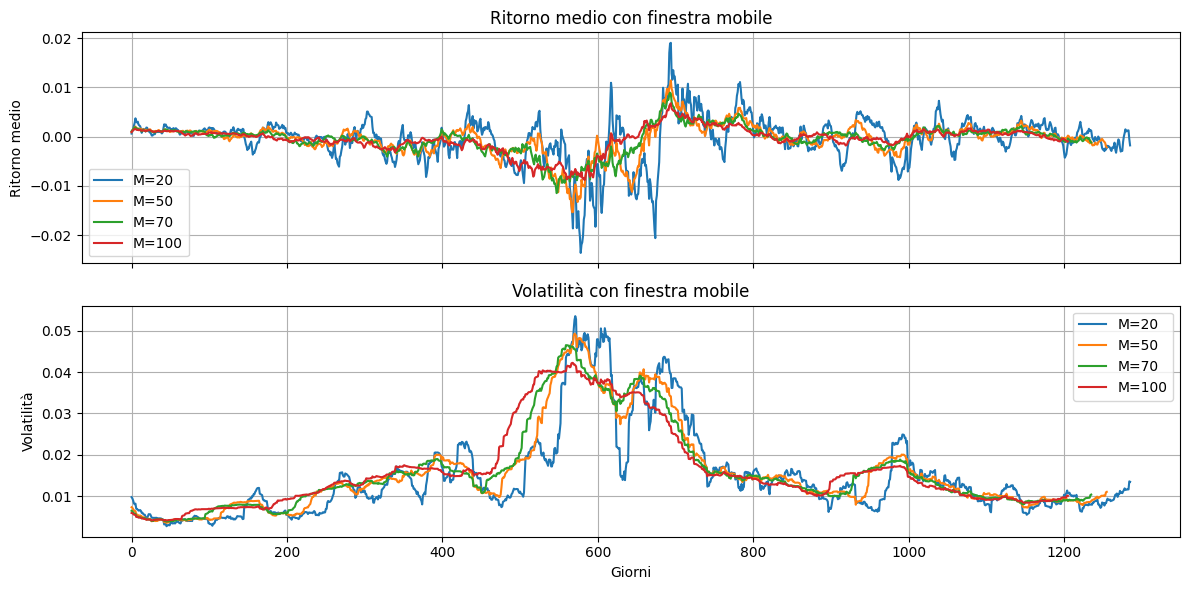

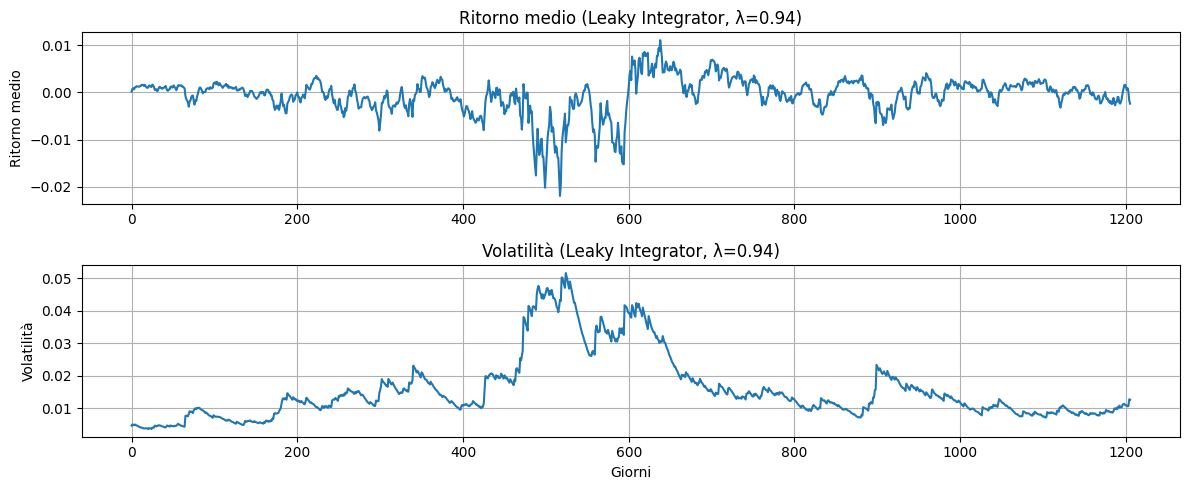

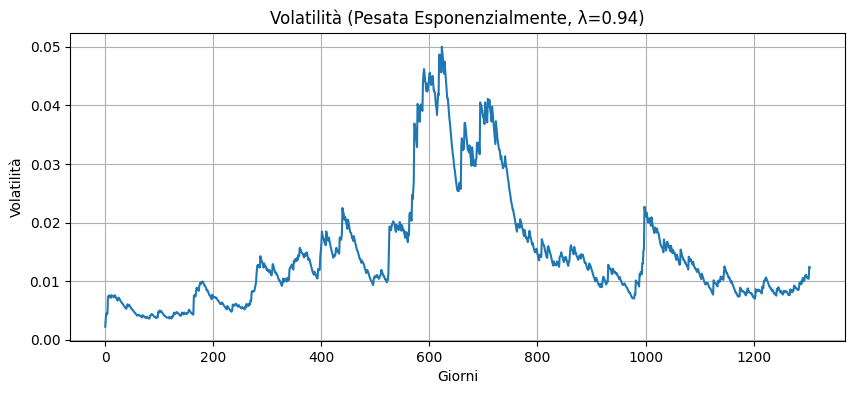

Calcoli completati per tutti i punti (a)-(d).


In [6]:
# ===========================
# (a) Lettura dati
# ===========================
dates = np.squeeze(sio.loadmat('data.mat')['dates_ts'])
price = np.squeeze(sio.loadmat('data.mat')['price_ts'])

print(f"Dati caricati: {len(price)} prezzi giornalieri.")

# Plot andamento prezzi
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(dates)), price)
plt.xlabel('Giorni')
plt.ylabel('Prezzo')
plt.title('Andamento del prezzo')
plt.grid(True)
plt.show()

# ===========================
# (b) Calcolo ritorno giornaliero
# ===========================
return_ts = (price[1:] - price[:-1]) / price[1:]
print(f"Ritorni calcolati: {len(return_ts)} campioni.")

plt.figure(figsize=(10, 4))
plt.plot(return_ts, '.', markersize=2)
plt.xlabel('Giorni (dal 2° in poi)')
plt.ylabel('Ritorno')
plt.title('Ritorno giornaliero')
plt.grid(True)
plt.show()

# ===========================
# (c) Media mobile e volatilità per vari M
# ===========================
M_vec = [20, 50, 70, 100]
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

for M in M_vec:
    h = np.ones(M) / M
    return_avg = np.convolve(return_ts, h, mode='valid')
    volatility = np.sqrt(np.convolve(return_ts**2, h, mode='valid') - return_avg**2)

    axs[0].plot(return_avg, label=f'M={M}')
    axs[1].plot(volatility, label=f'M={M}')

axs[0].set_ylabel('Ritorno medio')
axs[0].set_title('Ritorno medio con finestra mobile')
axs[0].grid(True)
axs[0].legend()

axs[1].set_xlabel('Giorni')
axs[1].set_ylabel('Volatilità')
axs[1].set_title('Volatilità con finestra mobile')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

# ===========================
# (d) Leaky integrator (λ=0.94)
# ===========================
lmbd = 0.94
h_li = (1 - lmbd) * np.power(lmbd, np.arange(100))

return_avg_li = np.convolve(return_ts, h_li, mode='valid')
volatility_li = np.sqrt(np.convolve(return_ts**2, h_li, mode='valid') - return_avg_li**2)

plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(return_avg_li)
plt.ylabel('Ritorno medio')
plt.title(f'Ritorno medio (Leaky Integrator, λ={lmbd})')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(volatility_li)
plt.xlabel('Giorni')
plt.ylabel('Volatilità')
plt.title(f'Volatilità (Leaky Integrator, λ={lmbd})')
plt.grid(True)

plt.tight_layout()
plt.show()

# ===========================
# (Extra) Volatilità pesata esponenzialmente (iterativa)
# ===========================
exp_average = 0
exp_volatility = np.zeros(len(return_ts) + 1)

for i in range(len(return_ts)):
    exp_average = lmbd * exp_average + (1 - lmbd) * return_ts[i]
    exp_volatility[i + 1] = lmbd * exp_volatility[i] + (1 - lmbd) * (return_ts[i] - exp_average)**2

exp_volatility = np.sqrt(exp_volatility[1:])

plt.figure(figsize=(10, 4))
plt.plot(exp_volatility)
plt.xlabel('Giorni')
plt.ylabel('Volatilità')
plt.title(f'Volatilità (Pesata Esponenzialmente, λ={lmbd})')
plt.grid(True)
plt.show()

print("Calcoli completati per tutti i punti (a)-(d).")
